# PROYECTO CLIENTES BETA BANK

## Descripción y Objetivos

Considerando que el costo de adquisición de nuevos clientes es mayor que mantener a los que ya se tienen, necesitamos predecir si un cliente dejará el banco. 
Vamos a utilizar los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.





Obetivos:
- Crear un modelo de machine learning que prediga el comportamiento de los clientes del banco.
- Tomar en cuenta como métrica de éxito del modelo, la variable F1.
- Conseguir un valor F1 de al menos 0.59 (determinado en un análisis previo) para un conjunto de datos de prueba.
- Complementar el análisis del modelo con la métrica AUC-ROC y su comparación con F1.

## Importación de Librerías

In [1]:
#Librerías Manejo de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Librerías de modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Librería separación
from sklearn.model_selection import train_test_split

#Librería codificación y estandarización
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

#Librería de Métricas
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score,roc_auc_score

from sklearn.utils import shuffle



## Importación de Datos

In [2]:
#Importamos los datos y asignamos a los índices los valores de la columna Row
clients = pd.read_csv('/datasets/Churn.csv', index_col='RowNumber')

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [4]:
clients.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0


## PRE PROCESAMIENTO DATOS

### Comprobación Duplicados

In [5]:
#Comprobación de duplicados
clients[clients.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,


No existen datos duplicados

### Eliminación Columnas

Debido a que el id y el apellido no son relevantes en el entrenamiento del modelo, se eliminan de la tabla

In [6]:
clients = clients.drop(['CustomerId','Surname'],axis=1)

In [7]:
clients

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


### Columna CreditScore

In [8]:
clients['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

### Columna Geography

In [9]:
clients['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Columna Gender

In [10]:
clients['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

### Columna Age

In [11]:
clients['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

### Columna Tenure

In [12]:
clients['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [13]:
clients[clients['Tenure'].isna()].sample(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
3625,640,France,Female,33,NaN,167298.42,1,0,1,145381.65,0
3472,632,France,Female,27,NaN,107375.82,1,1,1,62703.38,0
4961,811,France,Male,42,NaN,0.00,2,1,1,3797.79,0
7076,778,France,Female,34,NaN,109564.10,1,0,1,113046.81,0
5870,562,Germany,Male,31,NaN,112708.20,1,0,1,186370.30,0
4376,850,Germany,Male,41,NaN,60880.68,1,1,0,31825.84,0
4809,643,France,Female,33,NaN,137811.75,1,1,1,184856.89,0
5095,610,France,Male,37,NaN,0.00,1,1,0,114514.64,0
1157,615,France,Male,49,NaN,0.00,2,1,1,49872.33,0


- Hay 909 valores nulos de Tenure, lo que tiene sentido ya que serían clientes que no tienen el producto de depósito a plazo fijo
- No podemos procesar los valores NaN. Y considerando que no tener el deposito a plazo fijo equivale a no tener ningún año desde el inicio del depósito, procedemos a imputar con el valor 0 en los NaN

In [14]:
clients ['Tenure'] = clients['Tenure'].fillna(0)
clients['Tenure'].value_counts()

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64

### Columna Balance

In [15]:
clients['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

### Columna NumberOfProducts

In [16]:
clients['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

### Columna Has Credit Card

In [17]:
clients['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

### Columna Is Active Member

In [18]:
clients['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

### Columna Estimated Salary

In [19]:
clients['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

### Columna Exited

In [20]:
clients['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Del primer análisis por columnas podemos indicar que los tipos de variables están correctos, y además se puede conocer lo siguiente:
- La columna credit score están en un rango entre 650 y 850.
- La columna Geography consta de 3 países, concentrando la mayoría en Francia, con aproximadamente el doble que Alemania y España. Esto también nos dice que el banco debe ser Europeo.
- La columna Gender está dividido en Masculino y Femenino, con una distrubución de casi el 50% de los datos para cada categoría.
- La columna Age tiene un rango de entre 18 y 92 años. Con una media de 38 años y una concentración del 75% de los datos ubicados por debajo de 44. La mayoría de clientes son jóvenes o de edad media.
- La columna Tenure tiene un rango entre 0 a 10 años (para los clientes que si tienen este producto), y los clientes están distribuidos de manera bastante uniforme.
- La columna Balance muestra que el mínimo es de 0 y el máximo de dinero en una cuenta es de 250000, con un valor medio de 76000.
- La columna number of products está entre 1 y 4, siendo 1 y 2 los que mas clientes acumulan, lo cual es lógico porque los clientes bancarios no suelen utilizar todos los productos disponibles.
- La columna has credit card está dividida entre los que tienen (que son la mayoría con el 70% aprox.) y los que no tienen (corresponden casi al 30%).
- La columna is active member también está divida entre activos y no activos y está distribuida casi 50% para cada categoría.
- La columna Estimated Salary tiene un rango entre 11 y 200000, con una media de 100000.
- La columna Exited está clasificada entre los que no han dejado el banco (aproximadamente 80%) y los que han dejado el banco (aproximadamente 20%).

## PREPROCESAMIENTO

### Segmentación Datos de Entrenamiento-Validación

In [21]:
# Separación Variables Independientes y Variable Dependiente
features = clients.drop('Exited',axis=1)
target = clients['Exited']

print(features.shape)
print(target.shape)

(10000, 10)
(10000,)


In [22]:
#Separación en datos para entrenamieto y para prueba
features_train,features_valid,target_train,target_valid = train_test_split(features,
                                                                           target,
                                                                           test_size=0.25,
                                                                           random_state=12345)
#Comprobación conjuntos de datos separados
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(7500, 10)
(7500,)
(2500, 10)
(2500,)


### Para El Arbol de Decision y Bosque Aleatorio

#### Codificación Ordinal

In [23]:
#Escogemos las clases categóricas
category = ['Geography','Gender']

#creamos las variables correspondientes con la codificación ordinal
features_train_enc = features_train
features_valid_enc = features_valid

#creamos, entrenamos y realizamos la codificación de las columnas categóricas para cada grupo de datos
encoder = OrdinalEncoder()
encoder.fit(features_train[category])
features_train_enc [category] = encoder.transform(features_train[category])
features_valid_enc [category] = encoder.transform(features_valid[category])
features_train_enc

/tmp/ipykernel_320/3431710048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_enc [category] = encoder.transform(features_train[category])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_320/3431710048.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
227,694,0.0,0.0,30,9.0,0.00,2,1,1,26960.31
7757,621,2.0,0.0,36,7.0,116338.68,1,1,1,155743.48
2066,626,0.0,1.0,33,8.0,0.00,2,1,0,138504.28
2801,769,0.0,1.0,51,9.0,156773.78,2,1,0,40257.79
7029,718,1.0,1.0,26,0.0,147527.03,1,0,0,51099.56
...,...,...,...,...,...,...,...,...,...,...
4479,549,0.0,1.0,31,4.0,0.00,2,0,1,25684.85
4095,513,0.0,1.0,29,10.0,0.00,2,0,1,25514.77
3493,655,0.0,0.0,45,0.0,57327.04,1,0,1,47349.00


### Para La Regresión Logística

#### One Hot Econding

In [24]:
features_ohe = pd.get_dummies(features, drop_first=True)
features_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
1,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
2,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
3,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
5,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5.0,0.00,2,1,0,96270.64,0,0,1
9997,516,35,10.0,57369.61,1,1,1,101699.77,0,0,1
9998,709,36,7.0,0.00,1,0,1,42085.58,0,0,0


In [25]:
#División en grupo de entrenamiento y validación con los datos codificados con ohe
features_train_ohe,features_valid_ohe,target_train,target_valid = train_test_split(features_ohe,
                                                                           target,
                                                                           test_size=0.25,
                                                                           random_state=12345)
print(features_train_ohe.shape)
print(target_train.shape)
print(features_valid_ohe.shape)
print(target_valid.shape)

(7500, 11)
(7500,)
(2500, 11)
(2500,)


#### Estandarización

In [26]:
#escogemos las columnas numéricas con magnitudes grandes y rangos amplios
numeric = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
#inicializamos, entrenamos y realizamos la estandarización para las columnas numéricas que necesitan balanceo
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])
features_train_ohe [numeric]= scaler.transform(features_train_ohe[numeric])
features_valid_ohe [numeric]= scaler.transform(features_valid_ohe[numeric])
print(features_train_ohe)


           CreditScore       Age    Tenure   Balance  NumOfProducts  \
RowNumber                                                             
227           0.442805 -0.841274  1.426885 -1.224577              2   
7757         -0.310897 -0.270730  0.784858  0.641783              1   
2066         -0.259274 -0.556002  1.105871 -1.224577              2   
2801          1.217157  1.155631  1.426885  1.290462              2   
7029          0.690598 -1.221637 -1.462240  1.142121              1   
...                ...       ...       ...       ...            ...   
4479         -1.054275 -0.746183 -0.178184 -1.224577              2   
4095         -1.425964 -0.936365  1.747899 -1.224577              2   
3493          0.040142  0.585087 -1.462240 -0.304909              1   
2178          0.164039 -1.411819 -0.178184 -1.224577              2   
4579          0.411831 -0.080548 -1.141226 -1.224577              2   

           HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \


/tmp/ipykernel_320/2507876250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_ohe [numeric]= scaler.transform(features_train_ohe[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_320/2507876250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

## MODELOS DE MACHINE LEARNING

### Árbol de Decisión

In [27]:
#Bases de comparación 
best_depth = 0
best_acc = 0.5

#Pruebas de exactitud de acuerdo a la profundidad 
for i in range(2,11):
    #Creación árbol con profundidad variable
    arbol = DecisionTreeClassifier(random_state=12345, max_depth=i)
    arbol.fit(features_train_enc,target_train)
    predicted_valid = arbol.predict(features_valid_enc)
    tree_acc = accuracy_score(target_valid,predicted_valid)
    #Asignación de mejor exactitud en base a profundidad
    if tree_acc > best_acc:
        best_acc = tree_acc
        best_depth = i

print ('Profundidad:',best_depth,' | Mayor Exactitud:',best_acc)    

Profundidad: 7  | Mayor Exactitud: 0.8536


In [28]:
#Metricas de rendimiento para modelo con mayor exactitud
arbol = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
arbol.fit(features_train_enc,target_train)
predicted_valid = arbol.predict(features_valid_enc)
print(classification_report(target_valid,predicted_valid))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1965
           1       0.81      0.41      0.55       535

    accuracy                           0.85      2500
   macro avg       0.83      0.69      0.73      2500
weighted avg       0.85      0.85      0.83      2500



Se puede apreciar que la precisión es alta y adicional las 3 métricas para la clase 0 (no abandonó el banco) son bastante buenas en comparación con las de la clase 1 (F1-0=0.91 vs F1-1=0.54). Lo mas probable es que se deba al desequilibrio de clases, pues la clase 0 tiene el 80% de las observaciones.

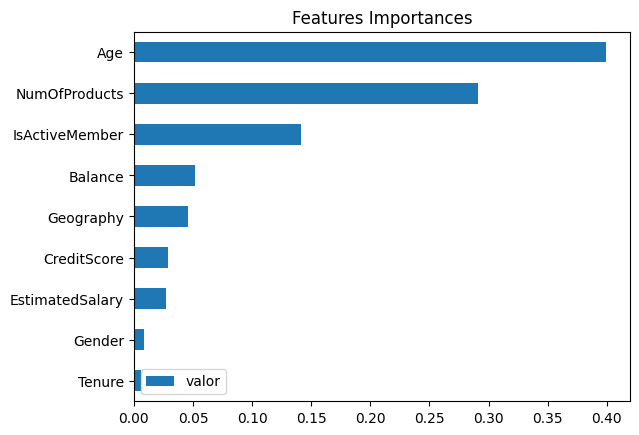

In [29]:
#Gráfico de los variables que el modelo considera mas relevantes
ver_imp= pd.DataFrame({'valor':arbol.feature_importances_},index=features_train.columns)
ver_imp.sort_values(by='valor', ascending=True,inplace=True)
ver_imp.query("valor > 0",inplace=True)
ver_imp.plot(kind='barh')
plt.title('Features Importances')
plt.show()

De acuerdo al gráfico, el árbol de decisión indica que el parámetro mas relevante durante su entrenamiento fue la edad de los clientes, seguido del número de productos que tienen contratados.
    

#### Balanceo de Clases con Submuestreo

Se va a utilizar submuestreo ya que la cantidad de datos es bastante amplia y el sobre muestreo puede llegar a causar problemas de overfitting en los árboles.

In [30]:
#Función que realiza el submuestreo de los conjuntos features y target
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=1234)

    return features_downsampled, target_downsampled   

In [31]:
# Submuestreo de los datos de entrenamiento 
features_down,target_down = downsample(features_train_enc,target_train,0.26)

#se escoge frac de 0.26 para igualar las observaciones de 0 y 1 
arbol1 = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
arbol1.fit(features_down,target_down)
predicted_valid1 = arbol1.predict(features_valid_enc)
print(classification_report(target_valid,predicted_valid1))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1965
           1       0.47      0.73      0.57       535

    accuracy                           0.76      2500
   macro avg       0.69      0.75      0.70      2500
weighted avg       0.82      0.76      0.78      2500



 Al haber compensado el desbalance de la clase objetivo e igualar la cantidad de observaciones, el score F1 de la clase 1 mejoró de 0.54 a 0.57, principalmente por el incremento en el recall de 0.41 a 0.73, esto es lógico pues el árbol ha encontrando nuevos patrones para tener una mayor sensibilidad ante la clase 1. Esto también ocasiona una disminución de la precisión ya que ahora se pueden encontrar mas falsos positivos.

### Bosque Aleatorio

In [32]:
#Bases de comparación 
best_depth = 0
best_acc = 0.5
best_e=10
#Pruebas de exactitud de acuerdo a la profundidad y estimadores
for i in range(2,11):
    for e in range (20,110,10):
        #Creación árbol con profundidad variable
        bosque = RandomForestClassifier(random_state=12345, n_estimators=e, max_depth=i)
        bosque.fit(features_train_enc,target_train)
        predicted_valid = bosque.predict(features_valid_enc)
        forest_acc = accuracy_score(target_valid,predicted_valid)
        #Asignación de mejor exactitud en base a profundidad
        if forest_acc > best_acc:
            best_acc = forest_acc
            best_depth = i
            best_e=e

print ('Estimadores: ',best_e,' | Profundidad:',best_depth,' | Mayor Exactitud:',best_acc)    

Estimadores:  30  | Profundidad: 10  | Mayor Exactitud: 0.856


In [33]:
#Métricas de rendimiento para el modelo con mayor precisión
bosque = RandomForestClassifier(random_state=12345, n_estimators=best_e, max_depth=best_depth)
bosque.fit(features_train_enc,target_train)
predicted_valid = bosque.predict(features_valid_enc)
print(classification_report(target_valid,predicted_valid))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1965
           1       0.83      0.41      0.55       535

    accuracy                           0.86      2500
   macro avg       0.84      0.69      0.73      2500
weighted avg       0.85      0.86      0.84      2500



Se puede apreciar que la precisión es alta y adicional las 3 métricas para la clase 0 (no abandonó el banco) son bastante buenas en comparación con las de la clase 1 (F1-0=0.91 vs F1-1=0.55). Podemos intentar realizar una compensación en la clase 1 que tiene menos observaciones.

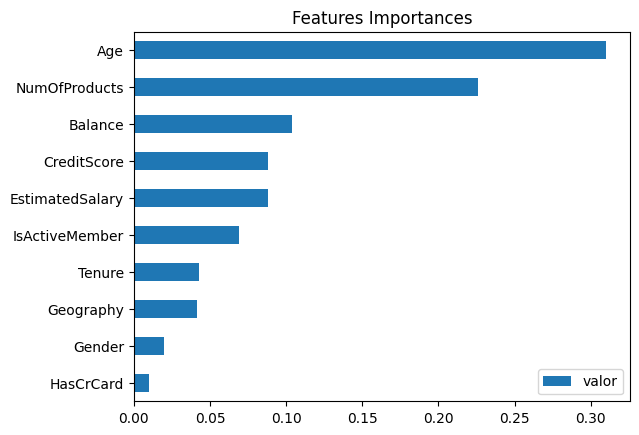

In [34]:
#Gráfico de los variables que el modelo considera mas relevantes
ver_imp= pd.DataFrame({'valor':bosque.feature_importances_},index=features_train.columns)
ver_imp.sort_values(by='valor', ascending=True,inplace=True)
ver_imp.query("valor > 0",inplace=True)
ver_imp.plot(kind='barh')
plt.title('Features Importances')
plt.show()

De acuerdo al gráfico, el bosque aleatorio indica que el parámetro mas relevante durante su entrenamiento fue la edad de los clientes, seguido del número de productos que tienen contratados (igual que el modelo anterior).

#### Balanceo de Clases con Submuestreo

In [35]:
#Probamos los datos con submuestreo en el bosque aleatorio
bosque1 = RandomForestClassifier(random_state=12345, n_estimators=best_e, max_depth=best_depth)
bosque1.fit(features_down,target_down)
predicted_valid1 = bosque1.predict(features_valid_enc)
print(classification_report(target_valid,predicted_valid1))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1965
           1       0.49      0.74      0.59       535

    accuracy                           0.78      2500
   macro avg       0.70      0.76      0.72      2500
weighted avg       0.83      0.78      0.79      2500



De igual forma que en los árboles, al haber compensado el desbalance de la clase objetivo e igualar la cantidad de observaciones, el score F1 de la clase 1 mejoró de 0.55 a 0.59, principalmente por el incremento en el recall de 0.41 a 0.74, esto es lógico pues el bosque ha encontrando nuevos patrones para tener una mayor sensibilidad ante la clase 1. Esto también ocasiona una disminución de la precisión ya que ahora se pueden encontrar mas falsos positivos. 

### Regresión Logística

#### Entrenamiento con Peso balanceado

In [36]:
regresion = LogisticRegression(random_state=12345,solver='liblinear',class_weight='balanced')
regresion.fit(features_train_ohe,target_train)
predicted_valid = regresion.predict(features_valid_ohe)
print(classification_report(target_valid,predicted_valid))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1965
           1       0.40      0.70      0.51       535

    accuracy                           0.71      2500
   macro avg       0.65      0.71      0.65      2500
weighted avg       0.79      0.71      0.73      2500



La regresión Logística también presenta unas métricas buenas en la clase 0, pues toma como base al desbalance que tienen los datos.

A pesar de que utilizamos el atributo class_weight balanceado, no conseguimos mejores métricas de F1 (0.51) y recall (0.70) que en el árbol o el bosque aleatorio.

#### Entrenamiento con Sobremuestreo

In [37]:
#Función que realiza el sobre muestreo de los conjuntos features y target 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

In [38]:
#Ejecución del sobre muestreo en el conjunto de entrenamiento codificado ohe
features_up,target_up = upsample(features_train_ohe,target_train,3)

In [39]:
#Entrenamiento Modelo balanceado 
regresion1 = LogisticRegression(random_state=12345,solver='liblinear')
regresion1.fit(features_up,target_up)
predicted_valid1 = regresion1.predict(features_valid_ohe)
print(classification_report(target_valid,predicted_valid1))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1965
           1       0.43      0.61      0.50       535

    accuracy                           0.74      2500
   macro avg       0.65      0.69      0.67      2500
weighted avg       0.78      0.74      0.76      2500



Al ajustar los datos de entrenamiento con sobre muestreo (la regresión no sufre de overfitting) también presenta unas métricas buenas solo para la clase 0.

Para la clase 1, F1 (0.5) y recall (0.61) son muy bajos a pesar de la compensación y peor que usar el atributo class_weight.

#### Cambio de Umbral

In [40]:
#Entrenamiento de una nueva regresión
regresion2 = LogisticRegression(random_state=12345,solver='liblinear')
regresion2.fit(features_train_ohe,target_train)

#Creación del grupo de probabilidades para cada observación
probabilities_valid = regresion.predict_proba(features_valid_ohe)
probabilities_one_valid = probabilities_valid[:, 1]

# Lazo para probar la respuesta de los scores ante el cambio de umbral
for threshold in np.arange(0, 0.45, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    
    precision = precision_score(target_valid,predicted_valid)
    recall = recall_score(target_valid,predicted_valid)
    f1 = f1_score(target_valid,predicted_valid)
    print('Threshold = {:.2f} | F1={:.3f}|Precision = {:.3f}, Recall = {:.3f}'.format(threshold,f1,precision, recall))

Threshold = 0.00 | F1=0.353|Precision = 0.214, Recall = 1.000
Threshold = 0.02 | F1=0.353|Precision = 0.214, Recall = 1.000
Threshold = 0.04 | F1=0.353|Precision = 0.214, Recall = 1.000
Threshold = 0.06 | F1=0.353|Precision = 0.215, Recall = 1.000
Threshold = 0.08 | F1=0.355|Precision = 0.216, Recall = 1.000
Threshold = 0.10 | F1=0.358|Precision = 0.218, Recall = 0.998
Threshold = 0.12 | F1=0.362|Precision = 0.221, Recall = 0.993
Threshold = 0.14 | F1=0.368|Precision = 0.226, Recall = 0.987
Threshold = 0.16 | F1=0.371|Precision = 0.229, Recall = 0.974
Threshold = 0.18 | F1=0.379|Precision = 0.235, Recall = 0.968
Threshold = 0.20 | F1=0.385|Precision = 0.241, Recall = 0.957
Threshold = 0.22 | F1=0.394|Precision = 0.249, Recall = 0.948
Threshold = 0.24 | F1=0.406|Precision = 0.258, Recall = 0.942
Threshold = 0.26 | F1=0.413|Precision = 0.266, Recall = 0.931
Threshold = 0.28 | F1=0.425|Precision = 0.276, Recall = 0.921
Threshold = 0.30 | F1=0.435|Precision = 0.286, Recall = 0.910
Threshol

La modificación del umbral no mejora considerablemente el score F1 para la clase 1, llegando al máximo (threshold 0.44) casi en los 0.5 que se configuran por defecto.

## PRUEBAS DE MODELO ESCOGIDO

Vamos a utilizar el Bosque Aleatorio al ser el que tiene mejor desempeño en la métrica F1. 

Se va a realizar un sub muestreo para mejorar el recall de la clase 1, puesto que considero que es mas importante bajar el número de falsos negativos. Es decir, a costa de la precisión y poder generar mayor número de falsos positivos, quiero predecir la mayor cantidad de clientes que pueden dejar el banco.

Esta consideración se hace tomando en cuenta que se debe tener un balance entre precisión y recall (maximizar f1 a la vez).

### Separación Entrenamiento-Validación-Prueba

In [41]:
#Separación en datos para entrenamieto 
features_train,features_temp,target_train,target_temp = train_test_split(features,
                                                                           target,
                                                                           test_size=0.4,
                                                                           random_state=12345)

#Separación en datos para validación y para prueba
features_valid,features_test,target_valid,target_test = train_test_split(features_temp,
                                                                           target_temp,
                                                                           test_size=0.5,
                                                                           random_state=12345)

#Comprobación de una separción correcta
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(6000, 10)
(2000, 10)
(2000, 10)
(6000,)
(2000,)
(2000,)


Realizamos una distribución de 60% para entrenamiento, 20% para validación y 20% para evaluación de acuerdo a lo que se recomienda.

In [42]:
#Codificación de los nuevos grupos para entrenar,validar y evaluar
features_t_enc = features_train
features_v_enc = features_valid
features_te_enc = features_test

features_t_enc [category] = encoder.transform(features_train[category])
features_v_enc [category] = encoder.transform(features_valid[category])
features_te_enc [category] = encoder.transform(features_test[category])

/tmp/ipykernel_320/2748045464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_t_enc [category] = encoder.transform(features_train[category])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_320/2748045464.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

### Submuestreo datos de entrenamiento

In [43]:
#aplicación del sub muestreo para mejorar el balance
features_down,target_down = downsample(features_t_enc,target_train,0.26)

### Entrenamiento Bosque

In [44]:
#Entrenamiento y comprobación de métricas
forest = RandomForestClassifier(random_state=12345,n_estimators=best_e,max_depth=best_depth)
forest.fit(features_down,target_down)

#Predicción conjunto de validación y evaluación
predicted_valid = forest.predict(features_v_enc)
predicted_test = forest.predict(features_te_enc)

#Métricas para conjunto de evaluación y prueba
pv=precision_score(target_valid,predicted_valid)
pt=precision_score(target_test,predicted_test)
rv=recall_score(target_valid,predicted_valid)
rt=recall_score(target_test,predicted_test)
fv=f1_score(target_valid,predicted_valid)
ft=f1_score(target_test,predicted_test)
print ('Validación : F1=',fv,'|Precision=',pv,'|Recall=',rv)
print()
print ('      Test : F1=',ft,'|Precision=',pt,'|Recall=',rt)

Validación : F1= 0.593170731707317 |Precision= 0.500823723228995 |Recall= 0.7272727272727273

      Test : F1= 0.5678776290630976 |Precision= 0.4767255216693419 |Recall= 0.7021276595744681


### AUC-ROC 

In [45]:
#Análisis de la métrica AUC-ROC
predicted_one = forest.predict_proba(features_v_enc)[:,1]
predicted_one_t = forest.predict_proba(features_te_enc)[:,1]
auc_roc_v = roc_auc_score(target_valid,predicted_one)
auc_roc_t = roc_auc_score(target_test,predicted_one_t)
print(auc_roc_v)
print(auc_roc_t)

0.8439305222025298
0.8397794237794778


## CONCLUSIONES

- El análisis se enfocó en entrenar un modelo de machine learning para clasificación, con el fin de distinguir entre clientes que no abandonan el Banco (clase 0) y aquellos que si lo hacen (clase 1).
- Al ser un problema de clasificación, se hizo pruebas con 3 tipos de modelo que son: Árbol de Clasificación, Bosque Aleatorio y Regresión Logística.
- Dentro de las columnas de datos pudimos observar lo siguiente:
    - Existen dos columnas categóricas (strings) que necesitan ser codificadas para utilizarlas en el entrenamiento de modelos.
    - Existe una columna Ternure correspondiente al tiempo que lleva en plazo fijo el dinero de los clientes que tienen este sevicio, posee datos nulos que fueron identados con 0 para poder procesar.
    - La columna objetivo presenta un claro desbalance de clase, puesto que el 80% de las datos corresponden a clientes que no han abandonado el banco (clase 0) y solo un 20% clase 1 (si abandonaron).
    - Existen diferentes escalas en las columnas numéricas, puesto que hay edades (18-92), balance (), score, etc, que necesitan ser escaladas para que el modelo de regresión los procese correctamente.
- Al comparar las métricas F1 y recall del árbol después del submuestreo, mejoraron los scores para nuestra clase de interés. Aunque precisión y exactitud se ven ligeramente perjudicadas.
- Al comparar las métricas F1 y recall del bosque aleatorio después del submuestreo, mejoraron los scores para nuestra clase de interés. Aunque precisión y exactitud se ven ligeramente perjudicadas.
- Al comparar las métricas F1 y recall de la regresión logística,los scores se presentaron mas altos al utilizar el atributo class_weight. Sin embargo el sobre muestreo y el ajuste de umbral, no consiguieron mejores resultados.
- Se realizó el entrenamiento del bosque aleatorio por tener la mejor respuesta de f1 para la clase 1, utilizando 3 grupos (entrenamiento,validación, test) y realizando un submuestreo para compensar el desbalance de clase.
- Se logró obtener un F1 de 0.59 en el conjunto de validación y 0.56 en evaluación.
- Se realizó en análisis de la métrica AUC ROC y se consiguió un resultado de 0.84 para validación y evaluación.
- El valor de F1 nos muestra un balance que existe entre la precisión y el recall, en nuestro caso particular se logró llegar a 0.59 al subir la sensibilidad para obtener mayor número de verdaderos postivos, sin incrementar de manera considerable los falsos positivos. En caso del AUC ROC tenemos un valor de 0.84 que nos indica que tan bien nuestro modelo separa la clase 1 de la clase 0, corresponde al área bajo la curva que crean el recall (tasa de verdaderos positivos) y la tasa de de falsos positivos para diferentes umbrales. Es decir al mejorar el recall, aumentamos nuestro F1 y AUC-ROC.
- Nos interesa que nuestros valores de F1 y AUC ROC sean altos puesto que queremos que la predicción distinga correctamente entre los clientes que abandonan y los que no, y que a la vez tengan un poco mas de énfasis en detectar aquellos que se pueden ir del banco, ya que es mas costoso adquirir un nuevo cliente, que mantener uno.
- Dentro de los parámetros observados en el entrenamiento, se pudo observar que la Edad y el número de productos que tiene el cliente, eran los que tenían mayor peso para la predicción.